
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer
Supply chain optimization (I). Sites selection for warehouses to minimize distribution costs (proximity to vendors, balanced against proximity to consumers). How many warehouses are needed, and what capacity each of them should have. The ideal data would be demographic\orders data on both the vendors and nearby population. Amazon would need to know the order volume of nearby populations along with projected growth which would be a forecasting problem. Also Amazon would need to compare that to vendor/transportation data to see what the optimal placement of warehouses would be.


Fake reviews detection. They still have tons of progress to make in this area: at least categorizing users would be a first step, so that buyers know what kind of user produced a specific review; then relevancy algorithms must be used to assess how relevant a review is for a specific product, knowing that most likes and stars assigned by users are biased - partly because most normal people don't have time or interest to write a review. Indeed, fake reviews is a lucrative business taking advantages of inefficiencies in platforms such as Amazon. The best solution is to remove user-generated reviews and replace them, for each product, by number of sales over the last 30 days.



# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [214]:
boston = datasets.load_boston()

X = boston.data
y = boston.target
features=boston.feature_names

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [159]:
X = np.concatenate((X, np.square(X)), axis=1)

## Answer



In [160]:
from sklearn import linear_model
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

Populating the interactive namespace from numpy and matplotlib


/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# A

In [26]:
DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


# B

In [37]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y,y_pred))


('Coefficients: \n', array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01]))
Mean squared error: 21.90
Variance score: 0.74


# C

105

In [162]:
X_train=X[:400]
y_train=y[:400]
X_test=X[400:]
y_test=y[400:]

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [164]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))


('Coefficients: \n', array([ -1.91246374e-01,   4.42289967e-02,   5.52207977e-02,
         1.71631351e+00,  -1.49957220e+01,   4.88773025e+00,
         2.60921031e-03,  -1.29480799e+00,   4.84787214e-01,
        -1.54006673e-02,  -8.08795026e-01,  -1.29230427e-03,
        -5.17953791e-01]))
Mean squared error: 38.16
Variance score: -0.35


# D

In [165]:
resid=y_pred-y_test

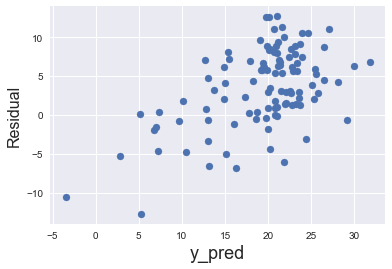

In [166]:
plt.scatter(y_pred, resid)
plt.xlabel('y_pred', fontsize=18)
plt.ylabel('Residual', fontsize=16)

# E

In [145]:
X = np.concatenate((X, np.square(X)), axis=1)

In [146]:
X_train=X[1:400]
y_train=y[1:400]
X_test=X[401:506]
y_test=y[401:506]

In [147]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))


('Coefficients: \n', array([ -6.29858595e-01,  -4.45165189e-02,   1.19794162e-01,
         1.12715814e+00,  -3.53735534e+01,  -1.70334797e+01,
        -1.77939367e-02,  -2.46397289e+00,   6.33212274e-01,
        -1.07058926e-01,  -6.13023162e+00,   4.17195544e-02,
        -1.45158404e+00,   5.05473617e-03,   5.07111842e-04,
        -4.40099663e-03,   1.12715811e+00,   8.70178640e+00,
         1.60509628e+00,   2.85884612e-04,   1.34957549e-01,
        -3.10265747e-02,   1.41835054e-04,   1.51177799e-01,
        -7.52873183e-05,   2.73178550e-02]))
Mean squared error: 32.14
Variance score: -0.17


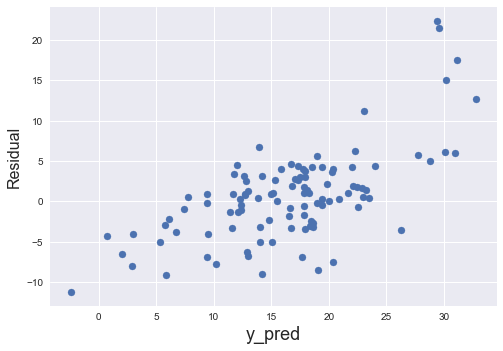

In [148]:
resid=y_pred-y_test
plt.scatter(y_pred, resid)
plt.xlabel('y_pred', fontsize=18)
plt.ylabel('Residual', fontsize=16)

# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



In [61]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# 1

In [207]:
# Lasso setup for cross validating the shrinkage parameter with K_fold cv.
lasso = Lasso(random_state=0,normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

# Uses function gridsearch to iterate the lasso model over the k_folds
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False,scoring='neg_mean_squared_error')#refit needs to be true?? need to standardize x's??
clf.fit(X, y)
#stores the scores of the cross validation
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
#plt.figure().set_size_inches(8, 6)
#plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
#std_error = scores_std / np.sqrt(n_folds)

#plt.semilogx(alphas, scores + std_error, 'b--')
#plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
#plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

#plt.ylabel('CV score +/- std error')
#plt.xlabel('alpha')
#plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.xlim([alphas[0], alphas[-1]])

In [208]:
print(clf.best_params_)

{'alpha': 0.008737642000038414}


### The optimal lambda for the cross validated lasso regression is the alpha show below. The lambda is relativly small meaning that the model needs to be more complex to get the optimal MSE. We chose to normalize the data because the data were all of different sizes/units and needed to be normalized so the appropriate lambda could be chosen. 

In [203]:
from sklearn.linear_model import Ridge


In [209]:
ridge = Ridge(random_state=0,normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False,scoring='neg_mean_squared_error')
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
#plt.figure().set_size_inches(8, 6)
#plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
#std_error = scores_std / np.sqrt(n_folds)

#plt.semilogx(alphas, scores + std_error, 'b--')
#plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
#plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

#plt.ylabel('CV score +/- std error')
#plt.xlabel('alpha')
#plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.xlim([alphas[0], alphas[-1]])

In [210]:
print(clf.best_params_)

{'alpha': 0.24885117821660568}


### The optimal lambda for the cross validated Ridge regression is the alpha show below. The lambda is relativly large meaning that the model needs to be less complex to get the optimal MSE. We chose to normalize the data because the data were all of different sizes/units and needed to be normalized so the appropriate lambda could be chosen.

# 2

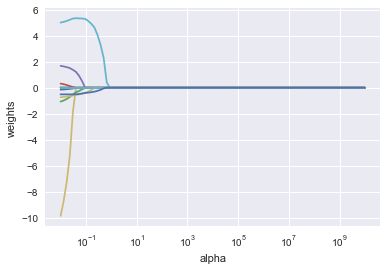

In [191]:
lasso = Lasso(random_state=0, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### For the lasso regression 

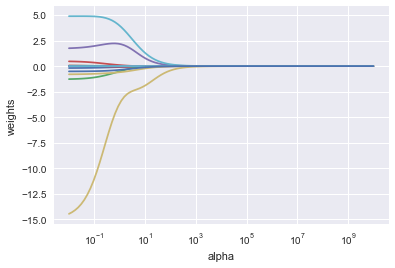

In [192]:
ridge = Ridge(random_state=0, normalize= True)
alphas = 10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)


ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Explanation

# 3

In [193]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))

Mean squared error: 38.16


## Explanation

In [198]:
lasso=linear_model.Lasso(alpha=0.008737642000038414)

In [199]:
lasso_fit=lasso.fit(X_train, y_train)
y_pred=lasso_fit.predict(X_test)
mean_squared_error(y_test, y_pred)

36.966328072979664

## Explanation

In [200]:
Ridge=linear_model.Ridge(alpha=0.24885117821660568)

In [201]:
ridge_fit=Ridge.fit(X_train, y_train)
y_pred=ridge_fit.predict(X_test)
mean_squared_error(y_test, y_pred)

37.106143869988685

## Explanation

# 4

In [225]:
X = np.concatenate((X, np.square(X)), axis=1)
lasso=LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_fit=lasso.fit(X_train, y_train)
y_pred=lasso_fit.predict(X_test)
mean_squared_error(y_test, y_pred)

27.779545759961216

## Explanation

In [226]:
lasso_fit.alpha_

0.45034000204920327

## Explanation

In [227]:
lasso_fit.coef_

array([-0.13653036,  0.04760123, -0.        ,  0.        , -0.        ,
        3.61496093,  0.00738769, -0.93671755,  0.42381303, -0.01777542,
       -0.65560863,  0.00561675, -0.64758452])

In [230]:
lasso_fit.

<bound method LassoCV.get_params of LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)>

In [228]:
DataFrame((zip(features, lasso_fit.coef_))).set_index(0)

,1
0,
CRIM,-0.136530
ZN,0.047601
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,3.614961
AGE,0.007388
DIS,-0.936718
RAD,0.423813


## Explanation

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

1: If the data were fit perfectly by a linear approxamation adding interaction terms to the model would only increase the variance of the model, with no significant decrease in bias. An example might be years of education as an undergraduate and total amount paid in tuition. 

2: If the data were extermely noisy, adding more interaction terms might be just 'chasing noise'. An example might be predicting stock market prices. If you fit the data really well with a complicated model you will likley just be chasing the noise of the stock market and wont make good predictions out of sample. A much simplier model would be suffice to adequetly predict stock market prices, like yesterdays stock price. 